In [67]:
import pyedflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def findAllIndexInList(aim, List):
    '''
    找到一个元素aim在列表List里全部的位置  并将所有的索引值打包成列表并返回
    '''
  
    pos = 0 	#pos代表List里each = aim时候each的索引值
    index=[] 	#所有pos打包到index里
    for each in List:
        if each == aim:
            index.append(pos)
        pos += 1
    return index

#把一个列表List里索引在Index里的元素取出来，元素组成一个 newList列表
def CreateNewListByIndex(Index, List):
    newList = []
    List = list(List)
    Index = list(Index)
    for each in Index:
        newList.append(List[each])
    return newList

#对一个列表List里的某个元素aim求概率 p(X=aim): 即 aim在List有多少个重复值/List元素总个数
def Pi(aim, List):
    length = len(list(List))  #求List一共有多少个元素，包括重复值
    aimcount = (list(List)).count(aim)	 #求aim在List里有多少个一样的值
    pi = (float)(aimcount/length)
    return pi

def entropy(data:list):   #输入的data 是 X 所有取值（重复值不去除）的列表

    data1 = np.unique(data)  
    # 找到列表里所有值（去除重复值）组成一个新的列表data1
    #这里没有numpy库的 可以用set函数把data变成一个集合，也可以去除重复值~
    
    resultEn = 0    #单个元素的熵H(X)保存在resultEn
    
    for each in data1:    #data1里保存的值不重复
        pi = Pi(each, data)    #求出data（data里的值可能重复）中每个 xi出现的概率
        resultEn -= pi * math.log(pi, 2)     #对不同xi的信息熵求和过程

    return resultEn

# conditionalEntropy 求条件熵 H(X|Y) = Σp(yi)*H(X|Y=yi)

def conditionalEntropy(dataX: list, dataY: list):
    #先对dataY处理：
    #YElementsKinds是所有原先dataY列表里不重复的元素组成的新列表：
    
    YElementsKinds = list(np.unique(dataY))
    
    resultConEn = 0  #最终条件熵H(X|Y)

    #在每个不同的yi = uniqueYEle 条件下:
    for uniqueYEle in YElementsKinds:
    
        YIndex = findAllIndexInList(uniqueYEle, dataY)   
        #找出dataY 里所有等于yi = uniqueYEl的索引值组成的列表
        
        dataX_Y = CreateNewListByIndex(YIndex, dataX)   #找到dataX里所有索引在YIndex里的值组成一个列表

        HX_uniqueYEle = entropy(dataX_Y)      #此时可以计算 HX_uniqueYEle =  H（X|Y=yi)
        pi = Pi(uniqueYEle, dataY)            #此时可以计算 pi = p(Y=yi)
        resultConEn +=  pi * HX_uniqueYEle       # 求和 H（X|Y）= Σ p(Y=yi)*H（X|Y=yi)
    return resultConEn      #返回条件熵 H（X|Y）

In [4]:
f = pyedflib.EdfReader(r"D:\BaiduNetdiskDownload\sz1.edf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)
print(type(sigbufs))
record=np.array(sigbufs)

<class 'numpy.ndarray'>


In [6]:
length=len(record[1])
pct=lambda x,y:np.array(np.percentile(range(x,y,1),[0,10,20,30,40,50,60,70,80,90,100]),dtype=int)
def fmat(li):
    for i in range(len(li)):
        li[i]=round(li[i],1)
    return li

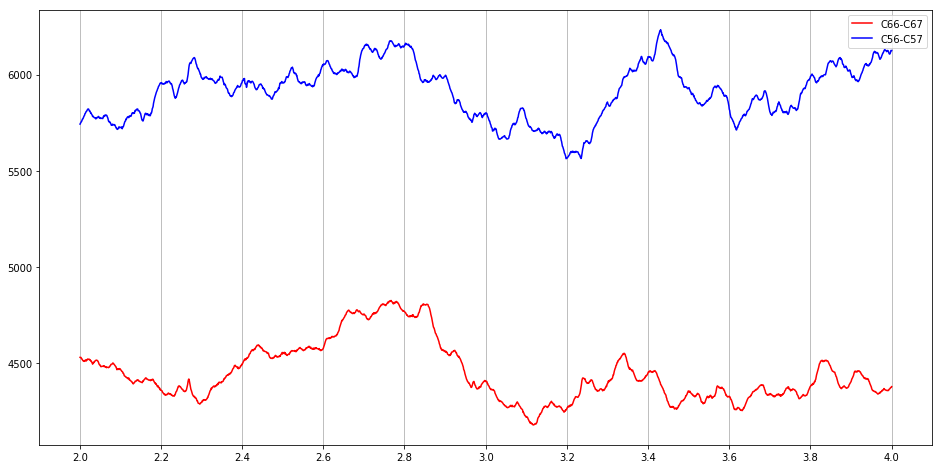

In [7]:
plt.figure(figsize=(16,8))
ax1,ax2=plt.plot(record[66,2000:4000]-record[67,2000:4000],'r',record[56,2000:4000]-record[57,2000:4000],'b')

plt.xticks(pct(0,2000),fmat(np.linspace(2,4,11)))
ax=plt.gca()
ax.xaxis.grid(True)
plt.legend([ax1,ax2],['C66-C67','C56-C57'],loc='best')
plt.show()

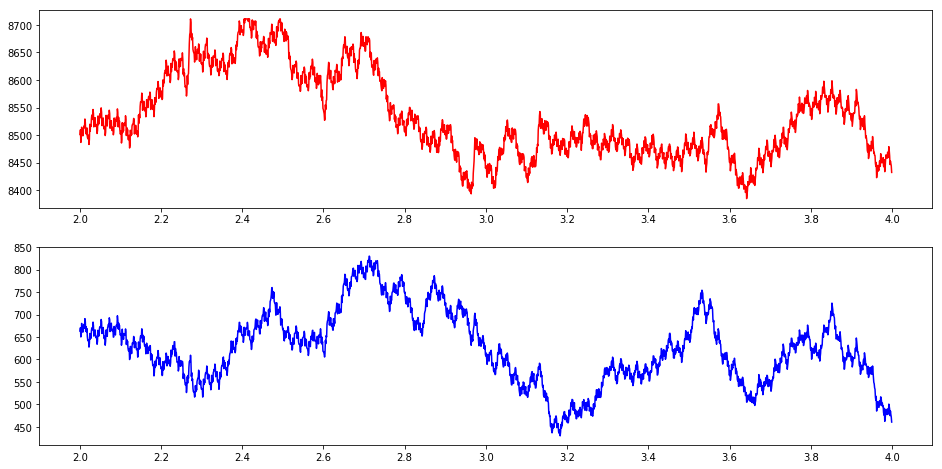

In [16]:
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.plot(record[56,1998:3997],'r')
plt.xticks(pct(0,2000),fmat(np.linspace(2,4,11)))
#plt.xaxis.grid(True)
plt.subplot(212)
ax2=plt.plot(record[62,1998:3997],'b')
plt.xticks(pct(0,2000),fmat(np.linspace(2,4,11)))
#plt.xaxis.grid(True)
plt.show()

In [12]:
np.corrcoef(record[56,2998:3997],record[62,2998:3997])

array([[1.        , 0.41154079],
       [0.41154079, 1.        ]])

In [32]:
mean56,mean62=np.mean(record[56,1998:3997]),np.mean(record[62,1998:3997])
s56_24,s62_24=record[56,1998:3997]-mean56,record[62,1998:3997]-mean62

'''
mean56,mean62=np.mean(s56_24),np.mean(s62_24)
s56_24,s62_24=s56_24-mean56,s62_24-mean62

np.mean(s56_24),np.mean(s62_24)
'''

'\nmean56,mean62=np.mean(s56_24),np.mean(s62_24)\ns56_24,s62_24=s56_24-mean56,s62_24-mean62\n\nnp.mean(s56_24),np.mean(s62_24)\n'

numpy.ndarray

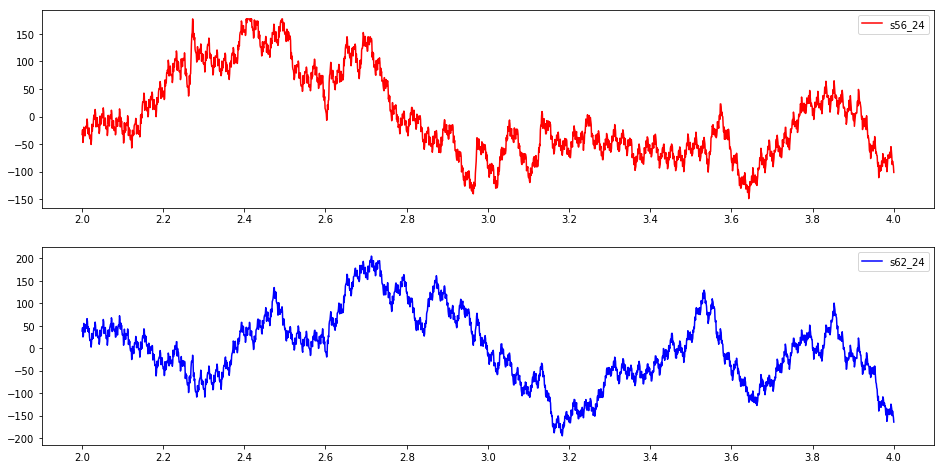

In [179]:
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.plot(s56_24,'r',label="s56_24")
plt.xticks(pct(0,len(s56_24)),fmat(np.linspace(2,4,11)))
plt.legend()
#plt.xaxis.grid(True)
plt.subplot(212)
plt.plot(s62_24,'b',label="s62_24")
plt.xticks(pct(0,len(s56_24)),fmat(np.linspace(2,4,11)))
#plt.xaxis.grid(True)
plt.legend()
plt.show()

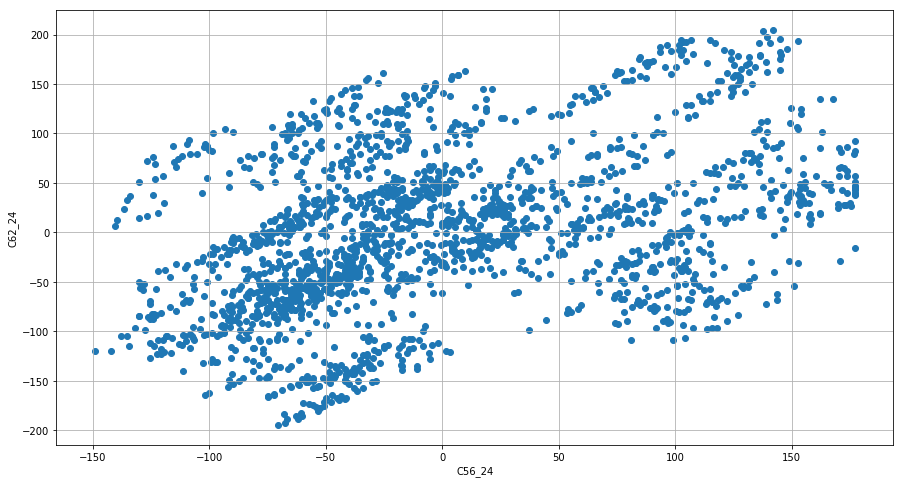

In [47]:
plt.figure(figsize=(15,8))
ax = plt.gca()                                            # get current axis 获得坐标轴对象
'''
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')         # 将右边 上边的两条边颜色设置为空 其实就相当于抹掉这两条边
ax.xaxis.set_ticks_position('bottom')   
ax.yaxis.set_ticks_position('left')          # 指定下边的边作为 x 轴   指定左边的边为 y 轴
ax.spines['bottom'].set_position(('data', 0))   #指定 data  设置的bottom(也就是指定的x轴)绑定到y轴的0这个点上
ax.spines['left'].set_position(('data', 0))
'''
plt.scatter(s56_24,s62_24)
plt.xlabel('C56_24')
plt.ylabel('C62_24')
plt.grid()

In [37]:
np.max(s56_24),np.min(s56_24),np.max(s62_24),np.min(s62_24)

(177.31600331332083,
 -149.1388070933317,
 204.79368352826748,
 -194.7678637365529)

In [134]:
xybins=np.linspace(np.min(s56_24),np.max(s56_24),7)

In [106]:
sxy=pd.DataFrame({'C56_24':s56_24,'C62_24':s62_24})
sxy=sxy.sort_values(by='C56_24')
sxy.index=range(len(sxy))
sxy['bins']=pd.cut(sxy['C56_24'],np.linspace(np.min(s56_24),np.max(s56_24),7),labels=range(1,7))
sxy[sxy.bins==6]["C62_24"].mean()

69.58913494463168

[3, 2, 6, 1]

In [109]:
def Q_P(x,y,bins):
    sxy=pd.DataFrame({'x':x,'y':y})
    sxy=sxy.sort_values(by='x')
    sxy.index=range(len(sxy))
    sxy['bins']=pd.cut(sxy['x'],bins,labels=range(1,len(bins)))
    Q=[]
    P=[]
    for i in range(len(bins)-1):
        Q.append(sxy[sxy.bins==i+1]['y'].mean())
        P.append((bins[i]+bins[i+1])/2) 
    return Q,P

In [135]:
Q,P=Q_P(s56_24,s62_24,xybins) 
Q2,P2=Q_P(s56_24,s62_24,xybins) 

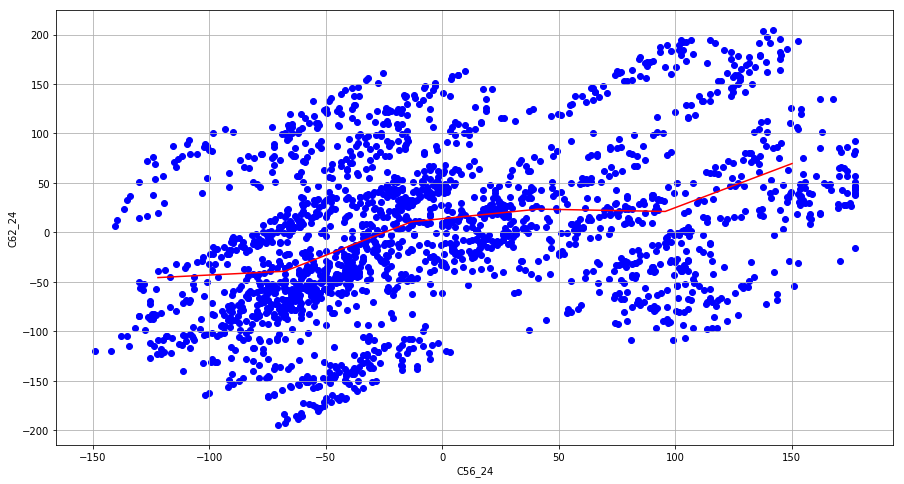

In [112]:
plt.figure(figsize=(15,8))
ax = plt.gca()                                            # get current axis 获得坐标轴对象
'''
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')         # 将右边 上边的两条边颜色设置为空 其实就相当于抹掉这两条边
ax.xaxis.set_ticks_position('bottom')   
ax.yaxis.set_ticks_position('left')          # 指定下边的边作为 x 轴   指定左边的边为 y 轴
ax.spines['bottom'].set_position(('data', 0))   #指定 data  设置的bottom(也就是指定的x轴)绑定到y轴的0这个点上
ax.spines['left'].set_position(('data', 0))
'''
plt.scatter(s56_24,s62_24,color='b')
plt.plot(P,Q,'r')
plt.xlabel('C56_24')
plt.ylabel('C62_24')
plt.grid()

In [161]:
def sx(i,x,P):
    '''
    i的取值范围是[1,len(P)-1]
    '''
    lp=len(P)
    if(i==1):
        if(x<=P[1]):
            return 1
        else:
            return 0
    if(i==lp-1):
        if x>P[lp-2]:
            return 1
        else:
            return 0
    if P[i-1]<x<P[i]:
        return 1
    else:
        return 0
    
def gx(i,x,Q,P):
    '''
    i的取值范围是[1,len(P)-1]
    '''
    k=(Q[i]-Q[i-1])/(P[i]-P[i-1])
    gx=k*(x-P[i-1])+Q[i-1]
    return gx

def fx(x,Q,P):
    '''
    L: the number of bins
    '''
    L=len(P)
    fx=0
    for i in range(L-1):
        fx+=sx(i+1,x,P)*gx(i+1,x,Q,P)
    return fx   

def h2(y,f):
    my=np.mean(y)
    sst=np.sum((y-my)**2)
    sse=np.sum((y-f)**2)
    h2=1-sse/sst
    return h2


In [174]:
def H2(s1,s2,step):
    bins1=np.linspace(np.min(s1),np.max(s1),step)
    Q1,P1=Q_P(s1,s2,bins1)
    f1=[]
    for x in s1:
        f1.append(fx(x,Q1,P1))
    f1=np.array(f1)
    h2s1=h2(s1,f1)
    
    bins2=np.linspace(np.min(s2),np.max(s2),step)
    Q2,P2=Q_P(s2,s1,bins2)
    f2=[]
    for x in s2:
        f2.append(fx(x,Q2,P2))
    f2=np.array(f2)
    h2s2=h2(s2,f2)
    
    H2=np.array([[0,h2s1],[h2s2,0]])
    return H2,Q1,P1,Q2,P2


In [175]:
H2,Q1,P1,Q2,P2 = H2(s56_24,s62_24,5)
H2

array([[0.        , 0.61722911],
       [0.57569878, 0.        ]])

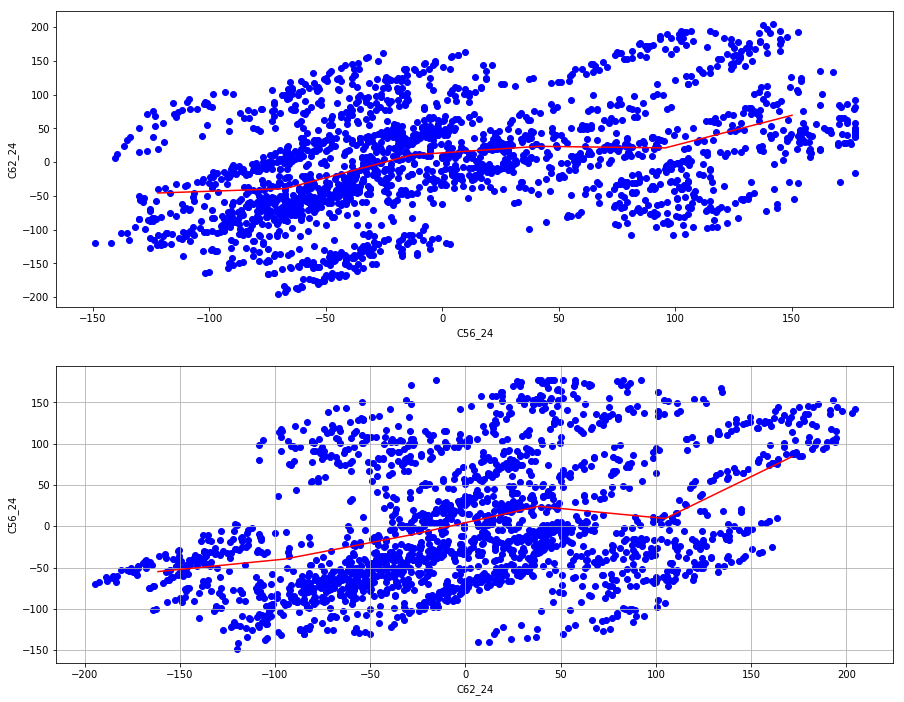

In [156]:
plt.figure(figsize=(15,12))
ax1=plt.subplot(211)
ax1.scatter(s56_24,s62_24,color='b')
ax1.plot(P1,Q1,'r')
ax1.set_xlabel('C56_24')
ax1.set_ylabel('C62_24')

ax2=plt.subplot(212)
ax2.scatter(s62_24,s56_24,color='b')
ax2.plot(P2,Q2,'r')
ax2.set_ylabel('C56_24')
ax2.set_xlabel('C62_24')

plt.grid()

In [147]:
P2

[-161.47106813115118,
 -94.8774769203478,
 -28.283885709544407,
 38.30970550125899,
 104.9032967120624,
 171.4968879228658]

In [128]:
h2(np.array([1,2,3]),np.array([1,2,3.5]))

0.875

In [132]:
np.corrcoef(s56_24,s62_24)

array([[1.        , 0.40320507],
       [0.40320507, 1.        ]])

In [121]:
tta=np.ones(5)
tta2=np.ones(5)
np.sum((tta+1-tta2)**2)

5.0

In [41]:
r=lambda a,b:(a-b)/np.max([a,b])

In [43]:
r(0.1322,0.1769)

-0.2526851328434143